<a href="https://colab.research.google.com/github/Prakum14/Testfiles/blob/master/M2_AST_01_Convolutional_Neural_Networks_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Assignment 1: CNN - MNIST, Cats & Dogs

## Learning Objectives:

At the end of the experiment, you will be able to:

1. Understand Conv2D and MaxPooling layers used in ConVNet
2. Build a simple ConvNet for image classification using the digit MNIST dataset
3. Build another  ConvNet for  image Classification using the cats-and-dogs dataset
4. Apply Data Augmentation





## 1. Building a simple CNN


Let's start with a simple example. We will
1. Build a CNN with convolution and pooling layers
2. Train it on the MNIST dataset

The figure below is a typical ConvNet (LeNet) architecture that we are going to build but with different numbers and sizes of filters.

![picture](https://drive.google.com/uc?export=view&id=1vT8e59AYTFRlrrI3C-iUHTctxyhfBiJJ)

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2416218" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "8975485400" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M2_AST_01_Convolutional_Neural_Networks_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    # ipython.magic("wget https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/Acoustic_Extinguisher_Fire_Dataset.xlsx")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Import libraries

In [4]:
# import libraries
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## Load data

In [5]:
# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"train_images.shape = {train_images.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
train_images.shape = (60000, 28, 28)


## Reshape and convert to float

In [6]:
# Reshape and convert to float
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
print(f"train_images.shape = {train_images.shape}")

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

train_images.shape = (60000, 28, 28, 1)


### Building the architecture
LeNet-5: Example of an early ConvNet

In [7]:
# Input layer: Defines the input shape for the model. It expects a 28x28 pixel image with 1 channel (grayscale).
inputs = keras.Input(shape=(28, 28, 1))

# First convolutional layer: Applies 32 filters of size 3x3 with ReLU activation function to extract features from the input.
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)

# First max-pooling layer: Reduces the spatial dimensions of the feature map by taking the maximum value over a 2x2 window.
x = layers.MaxPooling2D(pool_size=2)(x)

# Second convolutional layer: Applies 64 filters of size 3x3 with ReLU activation to further extract features.
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

# Second max-pooling layer: Reduces the spatial dimensions further with a 2x2 window.
x = layers.MaxPooling2D(pool_size=2)(x)

# Third convolutional layer: Applies 128 filters of size 3x3 with ReLU activation to extract deeper features.
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

# Flatten layer: Flattens the 3D output of the convolutional layers into a 1D vector for the fully connected layer.
x = layers.Flatten()(x)

# Output layer: A dense layer with 10 units (for 10 classes) and softmax activation function to output probability distribution over the 10 classes.
outputs = layers.Dense(10, activation="softmax")(x)

# Define the model: Specifies the input and output layers for the model.
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()
# Q: Verify no. of params in 1st conv layer # A: (3X3X1 + 1) X 32 ; 32 filters, 9 weights per kernel, 1 bias ber kernel

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",     # Q: Why sparse_cat_crossent?  A: labels are not one-hot-encoded
              metrics=["accuracy"])

#### Call Back Function

In [10]:
# Define a function to return a commonly used list of Keras callbacks
def def_callbacks(filepath, mod_chk_mon="val_loss", earlystop=0):
    # Initialize an empty list to store the callbacks
    callback_list = []

    # Default callback: ModelCheckpoint
    # This callback saves the model's weights at the specified `filepath` whenever there is an improvement
    # in the monitored metric (by default, "val_loss").
    # - `save_best_only=True` ensures that only the model with the best performance is saved.
    # - `monitor=mod_chk_mon` specifies the metric to monitor (e.g., validation loss).
    callback_list.append(keras.callbacks.ModelCheckpoint(
        filepath + ".keras",
        save_best_only=True,
        monitor=mod_chk_mon
    ))

    # Optional callback: EarlyStopping
    # If `earlystop` is greater than 0, add an EarlyStopping callback to the list.
    # This stops training when the monitored metric stops improving for a specified number of epochs (patience).
    # - `patience=earlystop` sets the number of epochs to wait before stopping once improvement stalls.
    if earlystop > 0:
        callback_list.append(keras.callbacks.EarlyStopping(patience=earlystop))

    # Return the list of callbacks
    return callback_list

### Training & Evaluation

In [11]:
# Set PARTIAL_RUN flag to indicate a shorter training run for testing purposes
PARTIAL_RUN = False

# Set the default number of epochs for full training
epochs = 10

# If PARTIAL_RUN is True, reduce the number of epochs for a quick run
if PARTIAL_RUN:
    epochs = 2  # Run a shorter training session (2 epochs)

# Train the model
# - `train_images` and `train_labels` are the training data and labels.
# - `epochs=epochs` uses the determined number of epochs (2 if PARTIAL_RUN is True, otherwise 10).
# - `validation_split=0.2` sets aside 20% of the training data for validation.
# - `batch_size=64` defines the batch size for gradient updates during training.
# - `callbacks=def_callbacks("prob1")` uses the `def_callbacks` function to set up model checkpoints and (optionally) early stopping.
model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_split=0.2,
    batch_size=64,
    callbacks=def_callbacks("prob1")
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8689 - loss: 0.4136 - val_accuracy: 0.9777 - val_loss: 0.0722
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9835 - loss: 0.0527 - val_accuracy: 0.9851 - val_loss: 0.0479
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9897 - loss: 0.0337 - val_accuracy: 0.9878 - val_loss: 0.0432
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9918 - loss: 0.0253 - val_accuracy: 0.9881 - val_loss: 0.0450
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9944 - loss: 0.0198 - val_accuracy: 0.9893 - val_loss: 0.0399
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9953 - loss: 0.0152 - val_accuracy: 0.9884 - val_loss: 0.0504
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9967 - loss: 0.0113 - val_accuracy: 0.9908 - val_loss: 0.0397
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9972 - loss: 0.0090 - val_accuracy: 0.

### Prediction on test data

In [12]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)  # Q: Which state is this model at? A: Slightly overfit, trained till 10th epoch
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9904 - loss: 0.0363
Test accuracy: 0.993


Nearly **99%** accurate! This is much better than what we achieved with our feedforward network with only dense layers!

### Now, let's see the importance of pooling layers.

We will make a new model called 'model_no_max_pool' without any pooling layers and compare it with the previous model.

In [13]:
# Define the input layer with a shape of 28x28 pixels and 1 color channel (grayscale image)
inputs = keras.Input(shape=(28, 28, 1))

# First convolutional layer
# - 32 filters, each of size 3x3
# - ReLU activation function for non-linearity
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)

# Second convolutional layer
# - 64 filters, each of size 3x3
# - ReLU activation function
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

# Third convolutional layer
# - 128 filters, each of size 3x3
# - ReLU activation function
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

# Flatten the output of the last convolutional layer
# This converts the 3D feature map into a 1D vector to be fed into the dense layer
x = layers.Flatten()(x)

# Output layer
# - 10 units for 10 classes (e.g., digits 0–9 in a digit classification task)
# - Softmax activation function for multi-class classification
outputs = layers.Dense(10, activation="softmax")(x)

# Create the model
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)


In [14]:
model_no_max_pool.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │         619,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 712,202 (2.72 MB)

 Trainable params: 712,202 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

#### Observations from models with and without pooling layers
1. The initial model with pooling layers had just 104,202 parameters but the model without pooling layers (model_no_max_pool) has 712,202 parameters i.e. increase in the number of trainable parameters. **Model with pooling layer is less prone to overfitting** due to a smaller number of parameters/weights.

2. What other advantage does the pooing layer provide? **They facilitate learning a spatial hierarchy of features**.

  In the CNN given below. Imagine a 1x1 patch on a C3 feature map. It contains information from 6x6 window of the input layer. On the other hand, if no pooling layers are present, then it would contain information from a 3x3 window in the input layer.


![picture](https://drive.google.com/uc?export=view&id=1vT8e59AYTFRlrrI3C-iUHTctxyhfBiJJ)

**Optional Exercise:** Train the model_no_max_pool
 with the MNIST data set and compare its accuracy with the first model.

**In class exercise:** Let's try to build a LeNet-5 architecure as given in above diagram right now:


* 1st Conv and 2nd Conv layers have a 3x3 & 5x5 kernel respectively
* Pooling layers have 2x2 kernel
* All activations as 'relu' except for last



In [15]:
# Define the input layer with a shape of 28x28 pixels and 1 color channel (for grayscale images)
inputs = keras.Input(shape=(28, 28, 1))

# First convolutional layer
# - Applies 6 filters, each with a size of 3x3
# - Uses 'same' padding to maintain the spatial dimensions (28x28) after convolution
# - ReLU activation introduces non-linearity
x = layers.Conv2D(filters=6, kernel_size=3, padding='same', activation='relu')(inputs)

# First pooling layer
# - Applies max pooling with a pool size of 2x2, reducing spatial dimensions by half (from 28x28 to 14x14)
x = layers.MaxPooling2D(pool_size=2)(x)

# Second convolutional layer
# - Applies 16 filters, each with a size of 5x5
# - 'Valid' padding, meaning no padding is added, so the spatial dimensions will reduce (from 14x14 to 10x10)
# - ReLU activation for non-linearity
x = layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='relu')(x)

# Second pooling layer
# - Max pooling with a 2x2 pool size, further reducing spatial dimensions by half (from 10x10 to 5x5)
x = layers.MaxPooling2D(pool_size=2)(x)

# Flatten layer
# - Flattens the 3D output into a 1D vector to prepare for fully connected layers
# - Output shape will be 16 * 5 * 5 = 400
x = layers.Flatten()(x)

# First dense (fully connected) layer
# - 120 neurons with ReLU activation
x = layers.Dense(120, activation='relu')(x)

# Second dense layer
# - 84 neurons with ReLU activation
x = layers.Dense(84, activation='relu')(x)

# Output layer
# - 10 neurons with softmax activation to produce a probability distribution over 10 classes (e.g., for digit classification)
outputs = layers.Dense(10, activation='softmax')(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Print a summary of the model's architecture
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 6)           │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,610 (240.66 KB)

 Trainable params: 61,610 (240.66 KB)

 Non-trainable params: 0 (0.00 B)

## 2. Image Classification


Now, we know how to build a simple CNN, let's build and train one to solve an image classification problem.

We will work with the cats-vs-dogs dataset to classify whether a given image is that of a cat or a dog .i.e a  binary classification problem.

### Import libraries

In [16]:
import os
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory

We have already uploaded the dataset into structured folders. You simply need to download it from our repository.

In [17]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/cats_vs_dogs_small.zip
!unzip -qq '/content/cats_vs_dogs_small.zip'

In [18]:
# Base directory where the main dataset folder is located
data_dir = '/content/cats_vs_dogs_small'

# Path to the training data directory
train_path = data_dir + '/train'

# Path to the validation data directory
validation_path = data_dir + '/validation'

# Path to the test data directory
test_path = data_dir + '/test'

Shape of the dog image is: (254, 500, 3)
Mean across height of all dog images in train set is: 363.293
Mean across width of all dog images in train set is: 397.275


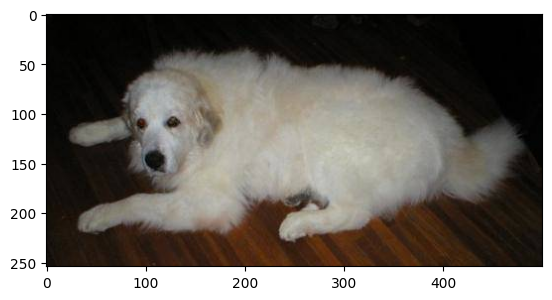

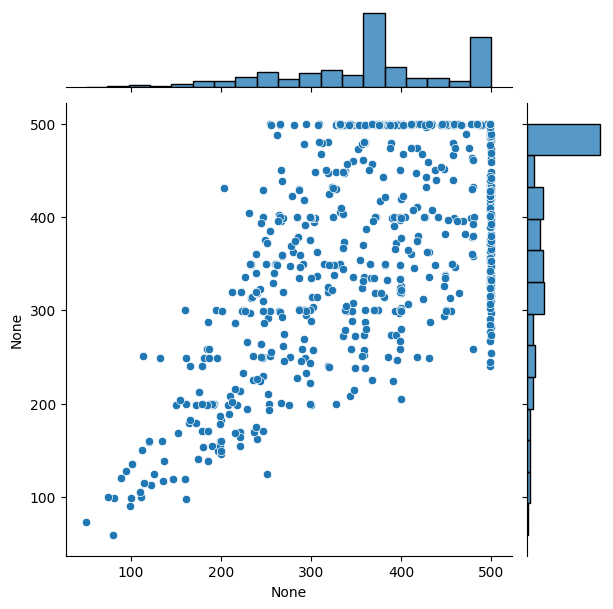

In [19]:
# Define the path to a sample dog image and display its shape
dog_image = train_path + '/dog/' + 'dog.443.jpg'
print("Shape of the dog image is:", imread(dog_image).shape)

# Display the sample dog image
plt.imshow(imread(dog_image))

# Initialize lists to store the dimensions of each dog image
dim1 = []
dim2 = []

# Loop over all dog images in the training directory
for image_file in os.listdir(train_path + '/dog'):
    # Read each image in the dog training folder
    img = imread(train_path + '/dog/' + image_file)
    # Get the height (d1), width (d2), and color channels of the image
    d1, d2, colour_channels = img.shape
    # Append the dimensions to respective lists
    dim1.append(d1)
    dim2.append(d2)

# Plot the distribution of image dimensions
sns.jointplot(x=dim1, y=dim2)
print("Mean across height of all dog images in train set is:", np.mean(dim1))
print("Mean across width of all dog images in train set is:", np.mean(dim2))

### Converting the image dataset into a workable format

We have the images in folders. We need to make it into a workable dataset:
  * Which has labels
  * All the images have the same size

For this, we will use the utility [**image_dataset_from_directory**](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory).

Calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories class_a and class_b, together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b).

In [20]:
# Load and prepare the training dataset
# - `train_path`: Directory path for training images
# - `image_size=(180, 180)`: Resize all images to 180x180 pixels to ensure uniform input dimensions
# - `batch_size=32`: Load images in batches of 32, which helps in efficient training
train_dataset = image_dataset_from_directory(
               train_path,
               image_size=(180, 180),  # Resize the images to (180,180)
               batch_size=32)

# Load and prepare the validation dataset
# - `validation_path`: Directory path for validation images
# - `image_size=(180, 180)`: Resize validation images to 180x180 pixels, matching the input size expected by the model
# - `batch_size=32`: Batch size of 32 for validation to save memory and maintain consistency with training batch size
validation_dataset = image_dataset_from_directory(
                      validation_path,
                      image_size=(180, 180),
                      batch_size=32)

# Load and prepare the test dataset
# - `test_path`: Directory path for test images
# - `image_size=(180, 180)`: Resize test images to 180x180 pixels, same as training and validation sizes
# - `batch_size=32`: Batch size of 32 for the test set for efficient processing
test_dataset = image_dataset_from_directory(
                test_path,
                image_size=(180, 180),
                batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [21]:
print(f"train_dataset = {train_dataset}")

train_dataset = <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [22]:
# Iterate over the batches in the training dataset
for data_batch, labels_batch in train_dataset:
    # Print the shape of a single batch of data (images)
    print("data batch shape:", data_batch.shape)

    # Print the shape of the corresponding labels batch
    print("labels batch shape:", labels_batch.shape)

    # Break after the first batch to verify batch size and avoid unnecessary iterations
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [23]:
# Define covnet model
# Define the input layer with a shape of (180, 180, 3), where:
# 180x180 is the height and width of the input images, and
# 3 corresponds to the three color channels (RGB).
inputs = keras.Input(shape=(180, 180, 3))

# Rescale input values to the range [0, 1],
# which is a common preprocessing step for images before feeding them into a neural network.
x = layers.Rescaling(1./255)(inputs)

# First convolutional layer with 32 filters, 3x3 kernel, and ReLU activation function.
# This layer will learn 32 feature maps from the input image.
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)

# Max-pooling layer with a pool size of 2, which reduces the spatial dimensions (height and width) of the input.
# This helps reduce the computational load and the risk of overfitting.
x = layers.MaxPooling2D(pool_size=2)(x)

# Second convolutional layer with 64 filters and ReLU activation, similar to the previous one, but now learning more complex features.
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

# Max-pooling layer again to downsample the feature maps.
x = layers.MaxPooling2D(pool_size=2)(x)

# Third convolutional layer with 128 filters and ReLU activation, learning even higher-level features.
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

# Max-pooling layer to further reduce spatial dimensions.
x = layers.MaxPooling2D(pool_size=2)(x)

# Fourth convolutional layer with 256 filters, continuing the trend of increasing the number of learned features.
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Max-pooling layer to reduce dimensionality.
x = layers.MaxPooling2D(pool_size=2)(x)

# Fifth convolutional layer with 256 filters and ReLU activation, capturing the most complex features.
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Flatten layer to convert the 3D tensor into a 1D vector, which is necessary for feeding the data into a fully connected layer.
x = layers.Flatten()(x)

# Dense layer with a single output unit and sigmoid activation function for binary classification.
# This layer will output a probability value between 0 and 1, representing the probability of the positive class.
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the final model by specifying the inputs and outputs.
model = keras.Model(inputs=inputs, outputs=outputs)

In [24]:
# Compile the model
model.compile(loss="binary_crossentropy",   # Q: Why binary_crossentropy? A: Binary classification
                      optimizer="rmsprop",
                      metrics=["accuracy"])

In [25]:
# Flag to control whether to run the full training or a partial run with fewer epochs
PARTIAL_RUN = False
epochs = 10  # Default number of epochs for training

# If PARTIAL_RUN is True, set the number of epochs to 2 for a quicker test run.
if PARTIAL_RUN:
  epochs = 2

# Fit the model using the training dataset and validate on the validation dataset.
# `train_dataset` and `validation_dataset` should be previously defined datasets (e.g., tf.data.Dataset objects or Keras ImageDataGenerators).

history = model.fit(
    train_dataset,  # The training dataset used to train the model
    epochs=epochs,  # Number of times to loop through the entire dataset
    validation_data=validation_dataset,  # Dataset used for validating the model's performance during training
    callbacks=def_callbacks("convnet_from_scratch_keras_model")  # List of callbacks to be applied during training
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 189ms/step - accuracy: 0.5172 - loss: 0.7620 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.5049 - loss: 0.6941 - val_accuracy: 0.5630 - val_loss: 0.6906
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.5424 - loss: 0.6926 - val_accuracy: 0.5850 - val_loss: 0.6776
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.5717 - loss: 0.6879 - val_accuracy: 0.5740 - val_loss: 0.6695
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.6073 - loss: 0.6579 - val_accuracy: 0.5900 - val_loss: 0.6650
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.6458 - loss: 0.6352 - val_accuracy: 0.5390 - val_loss: 1.0247
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.6708 - loss: 0.6423 - val_accuracy: 0.6880 - val_loss: 0.5929
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.7180 - loss: 0.5610 - val_accuracy: 0.6900 -

In [29]:
# Load the previously trained model from the specified file path
test_model = keras.models.load_model("convnet_from_scratch_keras_model.keras")

# Evaluate the model on the test dataset
# The evaluate() function returns the loss and metrics specified during model compilation (e.g., accuracy).
test_loss, test_acc = test_model.evaluate(test_dataset)

# Print the test accuracy with a precision of 3 decimal places
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.7233 - loss: 0.5499
Test accuracy: 0.723


Great! From just **2000** images, our network has learnt to classify images of cats and dogs with an accuracy of apx **70%**

## 3. Data Augmentation

The small dataset can cause a high variance estimation of model performance

Q: How to overcome this and get a more robust model?

Now, we want to avoid this problem altogether by artificially (and cleverly) producing new data from the already available data.

For this, we perform **data augmentation**.

Data augmentation is another regularization method. What other methods did we see in the last tutorial?

Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples via a number of random transformations that yield a believable-looking image. Common transformations include:
  * Flipping the image
  * Rotating the image
  * Zooming in/out of the image

See some sample images below after augmentation:

![picture](https://drive.google.com/uc?export=view&id=1HRhsHEHtcVptNVMF1EbCGiZX5XuTdrs5)

In [30]:
# Define a function to apply data augmentation transformations
def get_data_augmented(flip="horizontal", rotation=0.1, zoom=0.2):
    # Create a Sequential model that applies a series of transformations to the input images
    data_augmentation = keras.Sequential([
        keras.layers.RandomFlip(flip),       # Randomly flip the image horizontally or vertically (default is horizontal)
        keras.layers.RandomRotation(rotation),  # Randomly rotate the image by a given factor (0.1 means ±10% of 360 degrees)
        keras.layers.RandomZoom(zoom)        # Randomly zoom in or out the image (zoom factor of 0.2 means 20%)
    ])
    return data_augmentation

# Apply the data augmentation function to get the augmentations
data_augmentation = get_data_augmented()

In [31]:
# Define input layer: images of shape (180, 180, 3), where 180x180 is the image size, and 3 corresponds to RGB channels
inputs = keras.Input(shape=(180, 180, 3))

# Augmenting data - Apply random transformations to the images
# This ensures the network never sees the same data twice during training
x = data_augmentation(inputs)

# Rescaling: Normalize pixel values to the range [0, 1]
x = layers.Rescaling(1./255)(x)

# Convolutional Layer 1: 32 filters, 3x3 kernel, ReLU activation function
# This layer learns 32 feature maps from the input image.
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)  # Max pooling to downsample the feature map by a factor of 2

# Convolutional Layer 2: 64 filters, 3x3 kernel, ReLU activation
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)  # Max pooling to reduce spatial dimensions

# Convolutional Layer 3: 128 filters, 3x3 kernel, ReLU activation
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)  # Max pooling again

# Convolutional Layer 4: 256 filters, 3x3 kernel, ReLU activation
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)  # Max pooling

# Convolutional Layer 5: 256 filters, 3x3 kernel, ReLU activation
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Flatten the output from the convolutional layers into a 1D vector
x = layers.Flatten()(x)

# Dropout layer: This is a **regularization method** that helps prevent overfitting
# During training, it randomly drops 50% of the neurons (with probability of 0.5) in this layer
# This helps the network generalize better by forcing it to learn more robust features.
x = layers.Dropout(0.5)(x)

# Output layer: A dense layer with a single neuron, sigmoid activation for binary classification
# The output is a probability value between 0 and 1
outputs = layers.Dense(1, activation="sigmoid")(x)

# Define the complete model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with binary crossentropy loss (for binary classification),
# RMSprop optimizer, and accuracy as a metric
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [34]:
# Flag to control whether to run the full training or a partial run with fewer epochs
PARTIAL_RUN = False
epochs = 8  # Default number of epochs for training

# If PARTIAL_RUN is True, set the number of epochs to 2 for a quicker test run.
if PARTIAL_RUN:
    epochs = 2

# Train the model
history = model.fit(
    train_dataset,  # The dataset used to train the model
    epochs=epochs,  # Number of epochs to run the training
    validation_data=validation_dataset,  # Dataset used to validate the model after each epoch
    callbacks=def_callbacks("convnet_from_scratch_with_augmentation_keras")  # List of callbacks to be applied during training
)

Epoch 1/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6868 - loss: 0.5953 - val_accuracy: 0.7230 - val_loss: 0.5529
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7168 - loss: 0.5675 - val_accuracy: 0.7300 - val_loss: 0.5633
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6966 - loss: 0.5749 - val_accuracy: 0.7000 - val_loss: 0.5654
Epoch 4/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7209 - loss: 0.5549 - val_accuracy: 0.6850 - val_loss: 0.6247
Epoch 5/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7374 - loss: 0.5323 - val_accuracy: 0.7280 - val_loss: 0.5252
Epoch 6/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.7168 - loss: 0.5398 - val_accuracy: 0.7270 - val_loss: 0.5503
Epoch 7/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.7784 - loss: 0.4930 - val_accuracy: 0.7040 - val_loss: 0.5879
Epoch 8/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.7644 - loss: 0.4916 - val_accuracy: 0.7570 - val_loss:

In [35]:
# Load the previously trained model from the specified file path
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation_keras.keras")

# Evaluate the model on the test dataset
# The evaluate() function returns two values:
# - test_loss: The value of the loss function used during model training (e.g., binary crossentropy).
# - test_acc: The accuracy of the model on the test dataset.
test_loss, test_acc = test_model.evaluate(test_dataset)

# Print the test accuracy with 3 decimal places
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7465 - loss: 0.5322
Test accuracy: 0.739


With data augmentation, we roughly get **82-85%** accuracy. This is a big improvement over the previous approach, where we got roughly 70% accuracy.

### Please answer the questions below to complete the experiment:




In [37]:
#@title  We are applying 2 convolution filters of size 3X3 on an image of a size 6X6 Pixel having 3 channels. What is the shape of the output after the convolution operation and what is the number of parameters including bias? Given, no padding and stride is one. {run: "auto", form-width: "500px", display-mode: "form" }
Answer = "(3X3X2); 20" #@param ["", "(4X4X2); 56", "(3X3X2); 20", "(3X3X2); 56", "(4X4X2); 20"]

In [38]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [39]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nothing" #@param {type:"string"}

In [40]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [41]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [42]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [43]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1945
Date of submission:  17 Nov 2024
Time of submission:  17:29:04
View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions
